### [GitHub Link](https://github.com/graceshaoy/folktales)

### Research Question
How does storytelling differ across cultures? Are there common tropes – types of characters (anthropomorphized, old, supernatural, royal)? Are these tropes a result of specific ideals each culture holds?

### Data Collection
I can use folktale datasets to study folktales across the work. For proof of concept, I’m using an existing dataset created by Andrzej Panczenko on Kaggle ([found here](https://www.kaggle.com/datasets/andrzejpanczenko/folk-tales-dataset), accessed October 2022), which contains 2,838 folktales from 57 nations, scraped from [this website](https://fairytalez.com/regions/). The drawbacks of using a dataset for folktales should be noted: English translations are used for other languages; stories are told and retold, but are only recorded once here; the popularity/importance of each story is not considered; and the stories that are included might be of different types (are English folktales about Jack and Jill comparable to Chinese epics retold for children, like the Monkey King?)

In [ ]:
import pandas as pd
stories_orig = pd.read_csv('folk_tales_deduplicated.csv')
stories_orig.head()

,source,nation,title,text
0,https://fairytalez.com/momotaro/,japanese,Momotaro,If you’ll believe me there was a time when the...
1,https://fairytalez.com/the-birdcatcher/,serbian,The Birdcatcher,Near Constantinople there lived a man who knew...
2,https://fairytalez.com/sharing-joy-and-sorrow/,german,Sharing Joy and Sorrow,"There was once a tailor, who was a quarrelsome..."
3,https://fairytalez.com/the-punishment-of-gangana/,french,The Punishment of Gangana,Once upon a time there lived a king and queen ...
4,https://fairytalez.com/the-peace-with-the-snakes/,north_american_native,The Peace with the Snakes,In those days there was a Piegan chief named O...


### Legisign in Folktales

In [12]:
import utils
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
shared_nouns = pd.read_csv('save_progress/shared_nouns.csv')

By creating a list of lemmas (with bigrams preserved) for each story, I was able to compare the amount of times a lemma is used by nation. To make sure comparisons were based on patterns, I made comparisons using only nations with the most stories, and lemmas with the most usage, so variations in count are the result of an underlying cause, and not random variation. I chose to compare lemma usage across nations through the frequency the lemma appeared within that nation's stories, rather than count, to account for differences in how many stories from each nation the dataset includes. <br>
By comparing frequency, we can see how nations differ in the words they use to tell stories. 

For example, when comparing two nations known for having a very rich history, we can see how Chinese stories include the words emperor, heaven, dragon, as well as father and wife more often; while Greek stories include the words king, theseus, hero and maiden more often.

In [1]:
utils.plot_toplemmas_bar(shared_nouns,'chinese','greek')

NameError: name 'utils' is not defined

It's also interesting to note the difference in y-axis between the comparisons of Chinese and Greek, and Chinese and Indian. Because Chinese and Indian cultures are more similar than Chinese and Greek cultures, the difference in lemma frequences is smaller for Chinese and Indian. Within these differences, we can see that Indian stories talk about royalty (king, prince, queen, princess, palace) much more often than Chinese stories, which seem more supernatural (dragon, spirit, heaven).

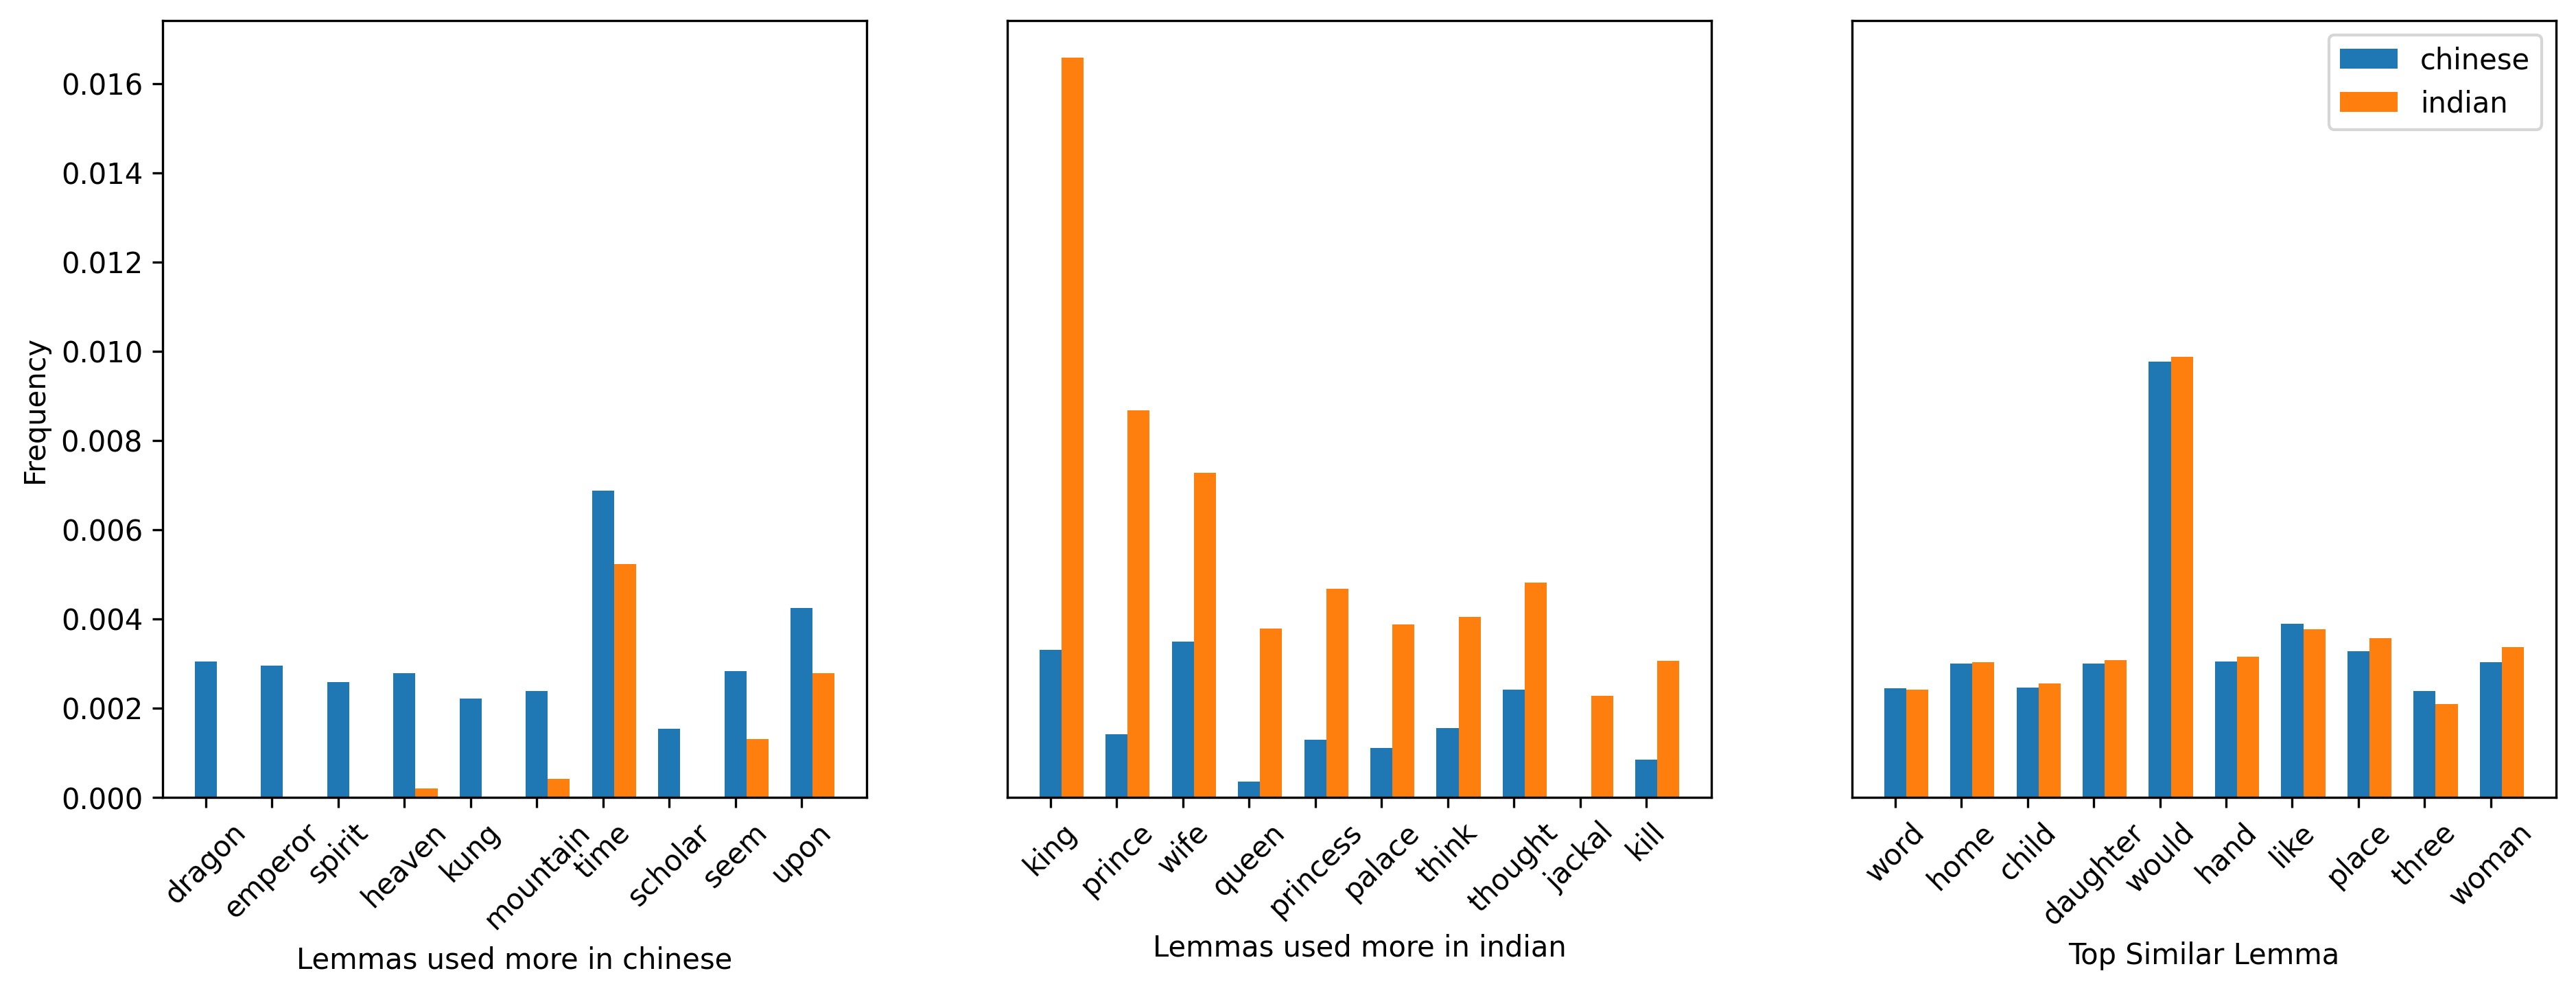

In [15]:
utils.plot_toplemmas_bar(shared_nouns,'chinese','indian')

We can even see specific characters within cultures: a comparision of English versus Nordic (which also has a smaller difference in lemma frequency than Chinese versus Greek!) brings the names jack, martin, thor, odin, loki, asgard, and baldur.

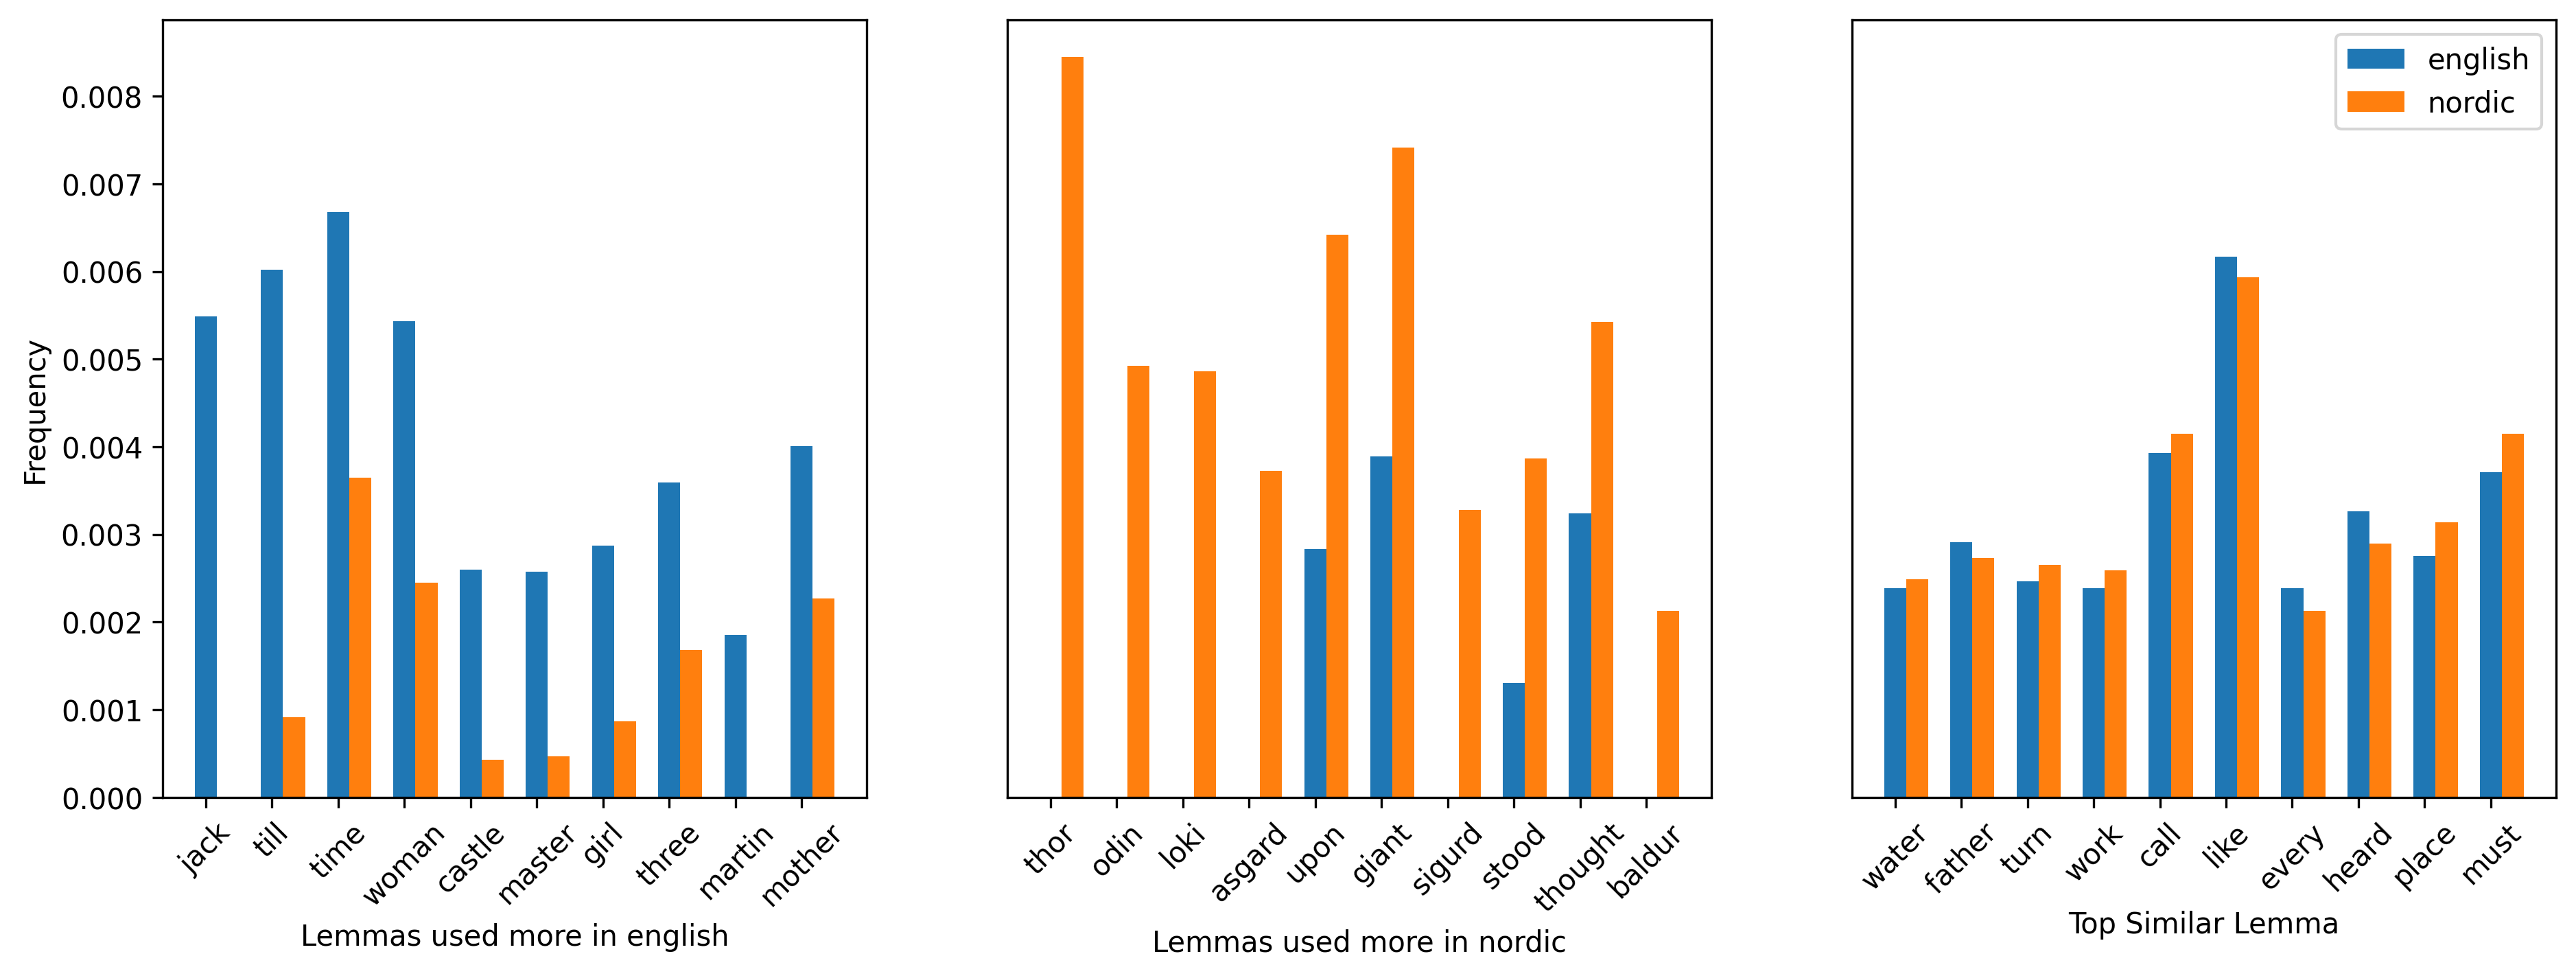

In [11]:
utils.plot_toplemmas_bar(shared_nouns,'english','nordic')

The difference in frequency demonstrates the usage of legisigns within each culture. The reason why the word "dragon" is used so much in Chinese stories is because it is a recognized legisign: the word "dragon" is the sign-vehicle with the interpretant of qualities such as strength, bravery, and royalty. The dragon legisign is a convention within Chinese culture that other cultures might not interpret in the same way. Similar lines of logic can be applied to other reoccuring characters: what qualities might Thor and Loki represent? Why is Jack a reoccurring character in English folktales? Each mention of these specific characters is a replica of a legisign. While less obvious, the less specific nouns can also function as part of a legisign. We  only have to look towards literary analysis to see how much the color "blue" can hold. Locations such as heaven, palaces, rivers, islands, and mountains can also be conventions (for example, rivers as a place of healing). Titles such as mother, brother, king, and scholar can also hold conventional meanings (for example, scholars as wise and kings as brave).

### Next Steps

Through these simple A vs B bar graphs, I've identified a pattern in words used in storytelling across cultures. To continue this analysis, it would be interesting to go beyond an analysis of lemmas. Using sentiment-analysis, I could label each story, and compare the score of each label across cultures. Such labels could include animal, magic, religious, and funny (based on an [existing typology](http://oaks.nvg.org/uther.html) of folktales, which has only been applied to Western stories). Other labels could include the purpose of the story, such as religious, funny, or lesson. Labels should be chosen with care, to best create categories that don't overlap (religious and lesson would heavily overlap). I could also use Latent Dirichlet Allocation create topics, and then go through and label the topics myself. The labeling of topics would use data already present in the dataset. <br>
Beyond lemmas and labels, it would also be interesting to relate cultures to each other through the stories they tell. Through clustering, we could create a heatmap of how similar the stories each culture tells are to each other. Using information outside this dataset, such as historical trade patterns, we could examine how stories travel.
<br>
To improve on the above mentioned drawbacks of the folktales dataset, future analysis could scrape stories from the web to include a wider variety of stories, a wider variety of retellings of the same story, and account for the popularity of stories (the more popular a story is, the more it would appear online). <br>
To better answer the question of whether the difference in storytelling is the result of a difference in ideals, data outside of the folktales dataset would have to be gathered. This is a large task in itself: gathering the ideals of a culture is difficult, but hints can be found in who they uphold (in religion, throughout history, currently) -- what similar qualities do these people have? Another measure for ideals could be in their laws: what portion of legislation is spent protecting what? What kinds of cases are raised, and which ones most often succeed? However, with an analysis of laws to extract cultural ideals, we must take note that many modern laws have been heavily influenced by colonization.